<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [2]:
# import the required function
from scipy.stats import norm

# set the values of sample mean and sigma
mu, sigma = 5, 1.3

# set the value of sample mean (Error in the sample)
x_bar = 5.25

# calculate the test statistic
test_stat = (x_bar - mu)/(sigma/np.sqrt(45))  # divide by the standard error.
test_stat  # This is the z- score, the standardized mean of our sample  mean

1.2900392177883402

Plot the distribution of the z-statistic

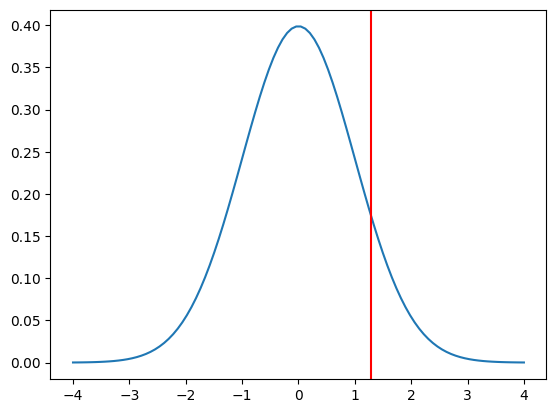

In [3]:
from scipy.stats import norm
x = np.linspace(-4, 4, 100)
plt.plot(x,norm.pdf(x, 0,1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

Calcualte the probability of getting a bigger value than 1.29

In [4]:
print(round(1 - norm.cdf(test_stat),2)*100,'%')

10.0 %


- This means, it is only in 10% of the instances are you likely to see a deviation of > 5.25.
- Is this enough evidence to conclude that the mean is slipping?

- We need to find a number such that being above it we will conclude that it is too large and we will reject the null hypotheses of mu = 5
- This value is called the **critical value** and it divides the distribution curve into the acceptance and rejection regions.

In [5]:
critical_value = norm.ppf(1-0.05) # 0.05 is our alpha, or level of significance. It is commonly 5% but can be lower or higher.
critical_value

1.6448536269514722

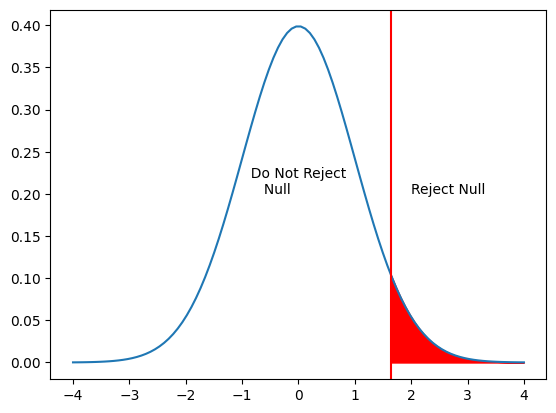

In [6]:
#Plot this to see the rejection and acceptance regions
from scipy.stats import norm
x = np.linspace(-4, 4, 100)
plt.plot(x,norm.pdf(x, 0,1))
plt.axvline(x = critical_value, c = 'r')
x1 = np.linspace(critical_value, 4, 50)
plt.fill_between(x1, norm.pdf(x1,0,1), color = 'red')
plt.annotate('Reject Null', (2, 0.20))
plt.annotate('  Do Not Reject\n     Null', (-1, 0.20))
plt.show()


Since 1.29, our standardized test statistic is in the acceptance region, we fail to reject the null hypothesis. It is large enough yes, but not large enough to warrant a conclusion of deviation.

On a p value basis, .01 (10% our p- value ) is larger than .05 (5%, our level of significance) therefore do not reject our null hypothesis

- You have collected 36 samples of coke whose mean is 580 ml.
- Test whether the amount of coke is different from 600 ml using a level of significance of 0.05.

**Two Tailed Tests**

In [7]:
# import the required function
from scipy.stats import norm

# set the values of sample mean and sigma
mu, sigma = 600, 50

# set the value of sample mean (Error in the sample)
x_bar = 580

# calculate the test statistic
test_stat = (x_bar - mu)/(sigma/np.sqrt(36))  # divide by the standard error.
test_stat  # This is the z- score, the standardized mean of our sample  mean

-2.4

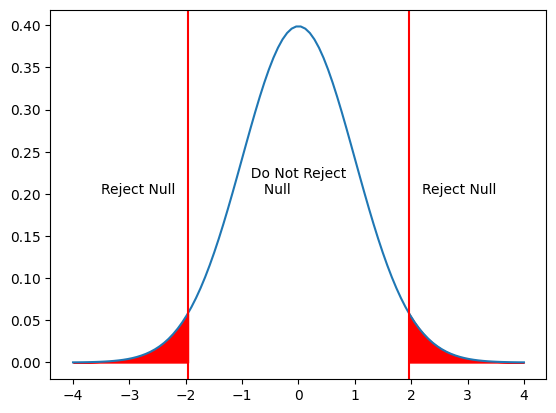

In [8]:
#find the critical values
critical_val1= norm.ppf(1-(0.05/2))
critical_val2= norm.ppf(0.05/2)


#Plot this to see the rejection and acceptance regions

x = np.linspace(-4, 4, 100)
plt.plot(x,norm.pdf(x, 0,1))

plt.axvline(x = critical_val1, c = 'r')
x1 = np.linspace(critical_val1, 4, 50)
plt.fill_between(x1, norm.pdf(x1,0,1), color = 'red')

plt.axvline(x = critical_val2, c = 'r')
x1 = np.linspace( -4,critical_val2, 50)
plt.fill_between(x1, norm.pdf(x1,0,1), color = 'red')

plt.annotate('Reject Null', (2.2, 0.20))
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n     Null', (-1, 0.20))
plt.show()

Clearly, **-2.4** lies in the rejection region. Therefore we reject the null hypothesis.

**1 *Sample* z-test Example**
- Test for one mean
- Sample size less than 30
- I taeild t-test

In [9]:
food = pd.read_csv('FastFood1.csv')
food.sample(5)

,Delivery,Time
11,12,39.8
10,11,45.3
20,21,41.1
19,20,42.0
1,2,39.5


In [10]:
food.shape

(25, 2)

- Ho: mu <= 40
- Ha: mu != 40

In [11]:
from scipy.stats import ttest_1samp

test_Stat, p_value = ttest_1samp(food['Time'], popmean = 40, alternative='greater') #Function returns two values, test statistic and p_value
print('The p-value is',round(p_value,15))

The p-value is 1.4822680928e-05


- p-value is much less than our alpha or level of significance so we can reject the null hypottheses.
- Hence we do  not have enough significance to conclude that the mean delivery time is less than 40 min as claimed by the advert.

In [12]:
food

,Delivery,Time
0,1,39.4
1,2,39.5
2,3,39.7
3,4,40.7
4,5,40.4
5,6,42.1
6,7,41.3
7,8,43.7
8,9,40.3
9,10,40.6


## Test for Equality of means (std dev)
- A Two sample situation setup as one tailed hypotheses test

In [13]:
rating = pd.read_csv('rating.csv')
rating.head()

,channel1_rating,channel2_rating
0,3.5,3.3
1,3.7,3.3
2,3.0,2.9
3,3.8,3.7
4,3.3,4.0


In [14]:
round(rating['channel1_rating'].mean(),1)

3.5

In [15]:
round(rating['channel2_rating'].mean(),1)

3.2

In [16]:
def ztest_2samp(X1,X2, pop_sd1, pop_sd2, n1, n2):
  from numpy import sqrt, abs
  from scipy.stats import norm
  se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2)
  test_stat = ((X1.mean() - X2.mean()) -0)/se
  pval = 1 - norm.cdf(abs(test_stat))
  return pval


In [17]:
p_value = ztest_2samp(X1 = rating['channel1_rating'].dropna(), X2 = rating['channel2_rating'], pop_sd1=0.48, pop_sd2=0.49, n1= 150, n2 = 300)
print(p_value)

5.87973714161194e-09


- This is well below 0.05.
- This means that there is statistical difference between the two channels hence we reject the null hypothesis that mu1 = mu2

## Test for equality of means where std has to be estimated
- When the variance is unknown, you use the **t-test**
- Variance is known, use the **z-test**

In [18]:
tvradio = pd.read_csv('TVRadio.csv')
tvradio.tail()

,Cable_TV,FM_Radio
10,14,15
11,14,18
12,14,17
13,16,15
14,24,23


In [19]:
tvradio.shape

(15, 2)

In [20]:
print('Cable TV mean and STD')
print(round(tvradio['Cable_TV'].mean(),2))
print(round(tvradio['Cable_TV'].std(),2))

Cable TV mean and STD
18.8
5.41


In [21]:
print('FM Radio mean and STD')
print(round(tvradio['FM_Radio'].mean(),2))
print(round(tvradio['FM_Radio'].std(),2))

FM Radio mean and STD
20.0
5.42


**Finding the p-value**

In [22]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(tvradio['Cable_TV'], tvradio['FM_Radio'], equal_var = True, alternative= 'two-sided')
print(round(p_value,4))

0.5491


- This p-value is significantly more than 0.05.
- We fail to reject the null hypothesis. Hence there is no difference between daily TV and Radio usage at 0.05 significance level.

## Test fo equality of means, std is unequal

In [23]:
satscore = pd.read_csv('SATVerbal1.csv')
satscore.head()

,College,High School
0,485,489.0
1,534,507.0
2,650,447.0
3,554,515.0
4,550,470.0


In [24]:
satscore.shape

(16, 2)

In [25]:
satscore.isna().sum()

College        0
High School    4
dtype: int64

In [26]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(satscore['College'], satscore['High School'].dropna(), equal_var = False, alternative= 'greater')
print(round(p_value,4))

0.008


- .008 is less than .05 which is enough evidence to reject the null hypothesis.
- There is a difference

## Paired Test for Equality of means

In [27]:
houseprice = pd.read_csv('Florida.csv')
houseprice.head()

,Metropolitan Area,Jan_2003,Jan_2002
0,Daytona Beach,117,96
1,Fort Lauderdale,207,169
2,Fort Myers,143,129
3,Fort Walton Beach,139,134
4,Gainesville,131,119


In [28]:
houseprice.shape

(15, 3)

In [29]:
diff = np.mean(houseprice['Jan_2003']) - np.mean(houseprice['Jan_2002'])
diff

15.0

In [30]:
from scipy.stats import ttest_rel

test_stat, p_value = ttest_rel(houseprice['Jan_2002'], houseprice['Jan_2003'], alternative= 'less')
print(round(p_value,5))

8e-05


p value of 0.0001 is less than our level of significance of 0.05 thus it is too small and we fail to reject the null hypothesis.



## Test of Proportions

In [31]:
#For one proportion
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest(24,90, value = 0.5, alternative= 'larger')
print(p_value)

0.9999997216721324


In [32]:
#Comparing two proportions
from statsmodels.stats.proportion import proportions_ztest

defect_count = np.array([20,25])
n_obs = np.array([200,400])

test_stat, p_value = proportions_ztest(defect_count, n_obs)
print(p_value)

0.10017829422626796


## Testing for equality in Variances
- Test for One Variance **chi-quare test** is used

In [34]:
from scipy.stats import chi2

#user defined function to get the test stat and p-value
def chi_var(pop_var, sample_var, n):
  test_stat = (n-1)* sample_var/pop_var
  p_value = 1 - chi2.cdf(test_stat, n-1)
  return (test_stat, p_value)

n= 32
sigma_2, s_2 = 22.4**2, 26.4**2
test_stat, p_value  = chi_var (sigma_2, s_2,n)
print('The p-value is', p_value)

The p-value is 0.0733923626973344


Test for 2 different samples
- We use the **F test**

In [35]:
bagweight = pd.read_csv('Bags1.csv')
bagweight.head()

,Machine 1,Machine 2
0,2.95,3.22
1,3.45,3.30
2,3.50,3.34
3,3.75,3.28
4,3.48,3.29


In [45]:
print(round(bagweight['Machine 1'].mean(),2))
print(round(bagweight['Machine 2'].mean(),2))

3.34
3.28


In [37]:
from scipy.stats import f

def f_test(x,y):
  x = np.array(x)
  y = np.array(y)

  test_stat = np.var(x, ddof=1)/np.var(y, ddof =1) #Calculate the f statistic
  dfn = x.size-1 #Define the degrees of freedom for the numerator
  dfd = y.size-1 #Define degrees of freedom for the denominator
  p =(1-f.cdf(test_stat, dfn, dfd))
  p1 = p*2 #Converting one tail test to two tail test
  return(print('The p value is{}'.format(round(p,8))))

#perfoam test
f_test(bagweight.dropna()['Machine 1'],bagweight.dropna()['Machine 2'])


The p value is2.55e-06


- The p value is much smaller than the level of significance, thus the null hypothesis can be rejected.
- We therefore have enough statistical evidence to conclude that there is a difference between the bag weights for the two machines at 0.05 significance level.

## Test of Independence
- Chi square test of independence
- We are interested in knowing if the two variables are independent
- Ho : Smoking and gender are independent
- Ha : Smoking and gender are not independent

In [46]:
beverage = pd.read_csv('Beverage.csv')
beverage.head()

,Age,Tea/Coffee,Soft Drink,Others
0,21 - 34,25,90,20
1,35 - 55,40,35,25
2,> 55,24,15,30


- Do we have enough evidence to conclude that beverage preference depends on age?
 - Ho : Beverage preference is independent of age
 - Ha : Beverage preference depends on age

In [47]:
from scipy.stats import chi2_contingency

#Find the p-value
chi, pvalue, dof, expected = chi2_contingency(beverage.drop('Age', axis = 1))
print(pvalue)

5.410957050304089e-10


- The p value is too small compared to the level of significance.
- We therefore reject the null hypothesis. There is evidence on the alternative, that beverage preference follow age at 5% significance level

## ANOVA Analysis of Variance
- ANOVA is used to determine whether the means of more than two independent populations are significantly different
- Analysis of variance because the p-value calculations rely heavily on using the variances of populations

In [48]:
aovdata = pd.read_csv('AOVData.csv')
aovdata.head()

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


Co_emmisions is the responce and fuel type is the factor

In [49]:
aovdata['fuel_type'].value_counts()

Petrol    179
LPG       170
E85       161
Name: fuel_type, dtype: int64